<a href="https://colab.research.google.com/github/PolinaSpesivtseva/Python_Visualisation/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22DataViz_HW1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from IPython.display import display, HTML


# Анимация при помощи `matplotlib`

Matplotlib позволяет создавать анимации при помощи модуля `matplotlib.animation`. Анимация является последовательностью кадров, где каждый кадр соответствует графику на `matplotlib.figure.Figure`. 

В рамках данного домашнего задания вы научитесь создавать анимации стандартного графика.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

## Классы для анимации

В `matplotlib` есть два способа анимации:

- `matplotlib.animation.FuncAnimation`: Создаем данные для первого кадра и меняем их для каждого кадра анимации.

- `matplotlib.animation.ArtistAnimation`: Создаем список артистов, которые отрисовывают каждый кадр анимации.

`matplotlib.animation.FuncAnimation` эффективнее по памяти и скорости, так как рисует артиста один раз и модифицирует его.

С другой стороны `matplotlib.animation.ArtistAnimation` более гибкий, так как позволяет последовательность любых артистов.

# Задание

Вам потребуется анимировать график высоты полета шара от времени для двух разных начальных условий: с начальной скоростью 5 и 12 м/с

Используйте различные стили для двух графиков (не только цвет).

$$z(t) = \frac{g t^2}{2} + V_0 t$$

Ячейка ниже содержит заготовку для вашего решения

От вас требуется:

1. Дописать функцию `height`
2. Заполнить `z1` и `z2`, передав соответсвующие аргументы в функцию `height`
3. Создать две линии (`plt.plot`), передав в них начальные точки (0, 0) из массивов времени и высот
4. Добавить подписи и ограничить оси через `ax.set` (почитайте [документацию](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set.html) и обратите внимание на аргументы, содержащие lim и label)
5. Дописать функцию `update`: она принимает номер кадра и обновляет данные на графиках `line1` и `line2` при помощи методов `set_xdata` для оси времени и `set_ydata` для высоты. (используйте срез `:frame`)

In [ ]:
def height(t: np.ndarray,
          V0: float,
          g: float = -9.81) -> np.ndarray:
    """ Высота полета шара в моменты времени t при начальной скорости V0
    Args:
          t: моменты времени, в которые считаем
          V0: начальная скорость
          g: ускорение свободного падения
      
      Returns:
          - Высота в моменты времени t
    """
    z = (g*t*t)/2 + V0*t
    return z

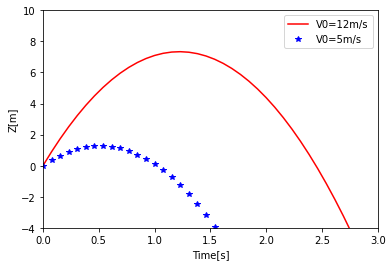

In [ ]:
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
V0 = 12
V02 = 5
z1 = height(t, V0, g)
z2 = height(t, V02, g)

line1 = ax.plot(t, z1, 'r', label='V0=12m/s')[0]
line2 = ax.plot(t, z2, 'b*', label='V0=5m/s')[0]
ax.set_xlim(0.0, 3.0)
ax.set_ylim(-4, 10)
ax.set_xlabel('Time[s]')
ax.set_ylabel('Z[m]')
ax.legend()


def update(frame):
    line1.set_xdata(t+frame)
    line1.set_ydata(height(t+frame, V0, g))
    line2.set_xdata(t+frame)
    line2.set_ydata(height(t+frame, V02, g))
    return (line1, line2)

ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=80)
display(HTML(ani.to_html5_video()))